In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        model = [
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1)
        ]
        
        self.model = nn.Sequential(*model)
        
    def forward(self, x):
        return self.model(x)
        

In [4]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        
        model = [
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1)
        ]
        
        self.model = nn.Sequential(*model)
        
    def forward(self, x):
        return self.model(x)

In [5]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
    
    
        model = [
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2)
        ]
        
        self.model = nn.Sequential(*model)
        
    def forward(self, x):
        return self.model(x)
        

In [6]:
model = Net()

In [7]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Files already downloaded and verified
Files already downloaded and verified


In [8]:
size = 8
dataloader = DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck
plane
frog
truck
horse
plane
car
cat


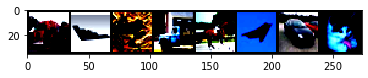

In [9]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(make_grid(imgs).permute(1, 2, 0))

for i in range(size):
    print(classes[labels[i]])

In [10]:
class_names = ['cat', 'dog']

label_map = {3: 0, 5:1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [3, 5]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [3, 5]]

In [11]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'cat'

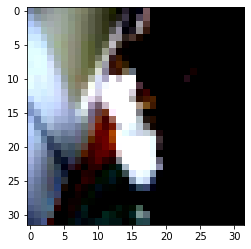

In [12]:
img, label = data_set[20]

plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [13]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.4619, 0.5381]], grad_fn=<SoftmaxBackward>)

In [14]:
_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

-> cat  model: dog


In [15]:
loss = nn.NLLLoss()

img, label = data_set[20]

out = model(img.view(-1).unsqueeze(0))

_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

loss(out, torch.tensor([label]))

-> cat  model: dog


tensor(-0.4619, grad_fn=<NllLossBackward>)

In [16]:
learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

lossFunction = nn.NLLLoss()

n_epochs = 5 #100

for epoch in range(n_epochs):
    for img, label in data_set:
        out = model(img.view(-1).unsqueeze(0))
        loss = lossFunction(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch} / {n_epochs}, Loss: {loss}")

Epoch: 0 / 5, Loss: -0.9987474679946899
Epoch: 1 / 5, Loss: -0.9999997615814209
Epoch: 2 / 5, Loss: -1.0
Epoch: 3 / 5, Loss: -0.9457367062568665
Epoch: 4 / 5, Loss: -1.0


In [17]:
train_loader = DataLoader(data_set, batch_size=64, shuffle=True)


model = Net2().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.02)

loss_function = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for inputs, targets in train_loader:
        
        inputs, targets = inputs.to(device), targets.to(device)
        
        
        outputs = model(inputs.view(inputs.shape[0], -1))
        loss = loss_function(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch} / {n_epochs}, Loss: {float(loss):.4f}" )

Epoch: 0 / 100, Loss: 0.6544
Epoch: 1 / 100, Loss: 0.6875
Epoch: 2 / 100, Loss: 0.6324
Epoch: 3 / 100, Loss: 0.6141
Epoch: 4 / 100, Loss: 0.6445
Epoch: 5 / 100, Loss: 0.5929
Epoch: 6 / 100, Loss: 0.6237
Epoch: 7 / 100, Loss: 0.5603
Epoch: 8 / 100, Loss: 0.6112
Epoch: 9 / 100, Loss: 0.9180
Epoch: 10 / 100, Loss: 0.5250
Epoch: 11 / 100, Loss: 0.6465
Epoch: 12 / 100, Loss: 0.5169
Epoch: 13 / 100, Loss: 0.6447
Epoch: 14 / 100, Loss: 0.4083
Epoch: 15 / 100, Loss: 0.5927
Epoch: 16 / 100, Loss: 0.5430
Epoch: 17 / 100, Loss: 0.2385
Epoch: 18 / 100, Loss: 0.3407
Epoch: 19 / 100, Loss: 0.3364
Epoch: 20 / 100, Loss: 0.4824
Epoch: 21 / 100, Loss: 0.4521
Epoch: 22 / 100, Loss: 0.1842
Epoch: 23 / 100, Loss: 0.2072
Epoch: 24 / 100, Loss: 0.3218
Epoch: 25 / 100, Loss: 0.2946
Epoch: 26 / 100, Loss: 0.4410
Epoch: 27 / 100, Loss: 0.1487
Epoch: 28 / 100, Loss: 0.1962
Epoch: 29 / 100, Loss: 0.2701
Epoch: 30 / 100, Loss: 0.0676
Epoch: 31 / 100, Loss: 0.2541
Epoch: 32 / 100, Loss: 0.1113
Epoch: 33 / 100, Los

In [18]:
val_loader = DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in val_loader:
        
        inputs, targets = inputs.to(device), targets.to(device)
        
        outputs = model(inputs.view(inputs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += targets.shape[0]

        correct += int((predicted == targets).sum())
      
print(f"Accuracy: {(correct / total):.4f}" )

Accuracy: 0.6215


->:  cat  model: cat


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


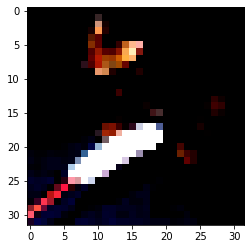

In [19]:
img, label = validation_set[20]
model.to('cpu')
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [20]:
train_loader = DataLoader(data_set, batch_size=64, shuffle=True)

model = Net3().to(device)

learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        
        imgs, labels = imgs.to(device), labels.to(device)
        
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch} / {n_epochs} , Loss: {float(loss):.4f}")

Epoch: 0 / 100 , Loss: 0.6080
Epoch: 1 / 100 , Loss: 0.6563
Epoch: 2 / 100 , Loss: 0.6672
Epoch: 3 / 100 , Loss: 0.6503
Epoch: 4 / 100 , Loss: 0.6171
Epoch: 5 / 100 , Loss: 0.6810
Epoch: 6 / 100 , Loss: 0.5328
Epoch: 7 / 100 , Loss: 0.6920
Epoch: 8 / 100 , Loss: 0.6206
Epoch: 9 / 100 , Loss: 0.6295
Epoch: 10 / 100 , Loss: 0.5225
Epoch: 11 / 100 , Loss: 0.9136
Epoch: 12 / 100 , Loss: 0.5289
Epoch: 13 / 100 , Loss: 0.5867
Epoch: 14 / 100 , Loss: 0.5687
Epoch: 15 / 100 , Loss: 0.5024
Epoch: 16 / 100 , Loss: 0.4595
Epoch: 17 / 100 , Loss: 0.5167
Epoch: 18 / 100 , Loss: 0.6741
Epoch: 19 / 100 , Loss: 0.4832
Epoch: 20 / 100 , Loss: 0.6919
Epoch: 21 / 100 , Loss: 0.6051
Epoch: 22 / 100 , Loss: 0.5887
Epoch: 23 / 100 , Loss: 0.3240
Epoch: 24 / 100 , Loss: 0.5095
Epoch: 25 / 100 , Loss: 0.4479
Epoch: 26 / 100 , Loss: 0.4939
Epoch: 27 / 100 , Loss: 0.6836
Epoch: 28 / 100 , Loss: 0.2796
Epoch: 29 / 100 , Loss: 0.7784
Epoch: 30 / 100 , Loss: 0.3700
Epoch: 31 / 100 , Loss: 0.4685
Epoch: 32 / 100 , 

In [21]:
val_loader = DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in val_loader:
        
        inputs, targets = inputs.to(device), targets.to(device)
        
        outputs = model(inputs.view(inputs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += targets.shape[0]
        correct += int((predicted == targets).sum())
        
print(f"Accuracy: {(correct / total):.4f}")

Accuracy: 0.6210


In [22]:
train_loader = DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in train_loader:
        
        inputs, targets = inputs.to(device), targets.to(device)
        
        outputs = model(inputs.view(inputs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += targets.shape[0]
        correct += int((predicted == targets).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


correct:  dog  model: dog


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


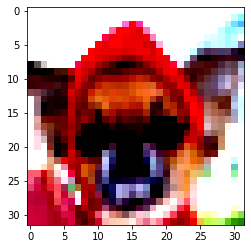

In [23]:
img, label = validation_set[30]
model.to('cpu')
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('correct: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))

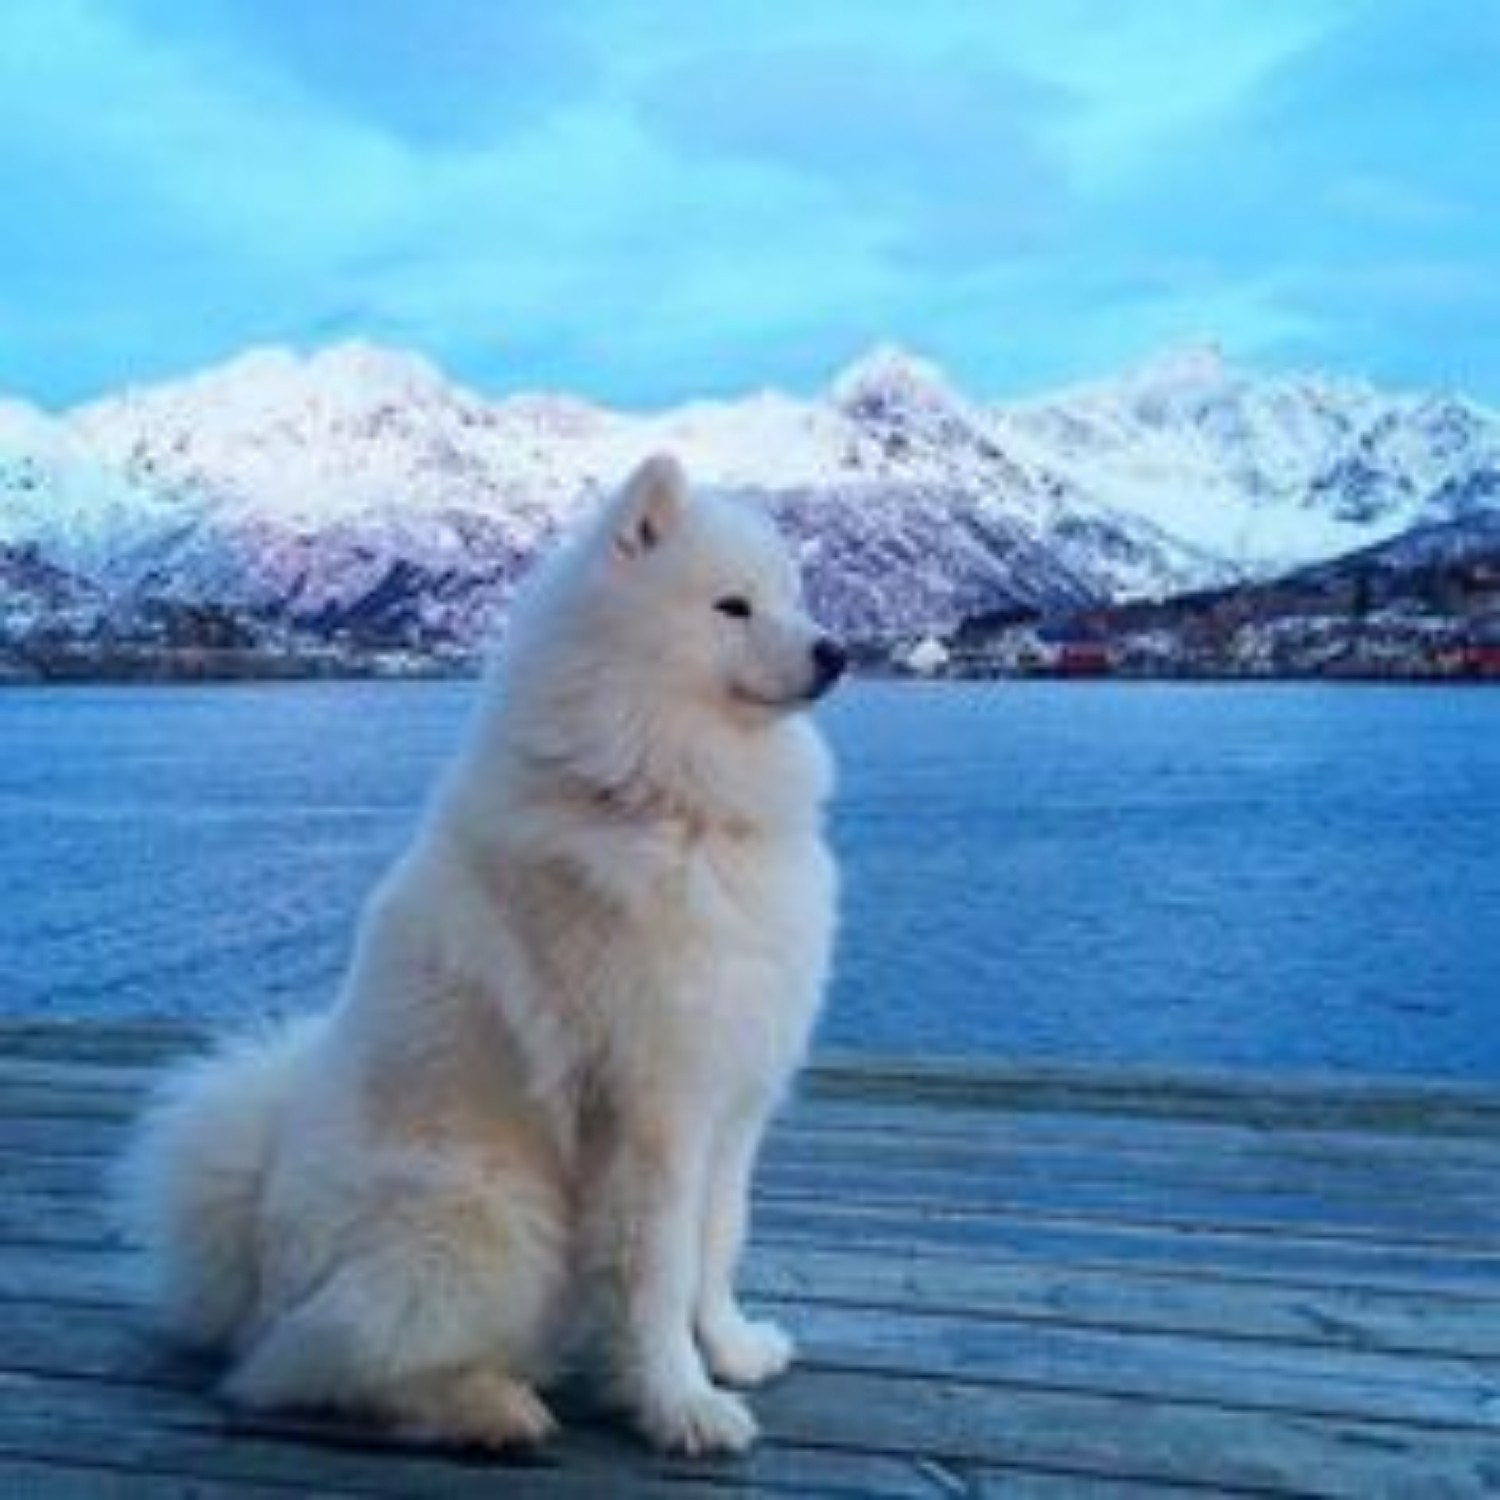

In [24]:
image = request.urlretrieve('https://cdn.fotofits.com/petzlover/gallery/img/l/samoyed-789193.jpg','test,jpg')
                            
img = Image.open(image[0])
img

correct: dog   model: dog


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


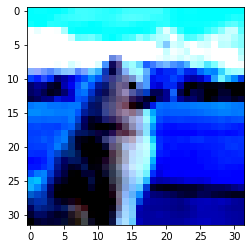

In [25]:

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: dog ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))

In [26]:
import time

train_loader = DataLoader(data_set, batch_size=64, shuffle=True)

model = Net3().to(device)

learning_rate = 0.01


for device in ['cpu', 'cuda']:

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    model.to(device)

    for ii, (inputs, targets) in enumerate(train_loader):

        inputs, targets = inputs.to(device), targets.to(device)

        start = time.time()


        outputs = model(inputs.view(inputs.shape[0], -1))
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if ii==3:
            break
        
    print(f"Device = {device}: Time per batch: {(time.time() - start)/3:.4f} seconds")
    
    

Device = cpu: Time per batch: 0.0053 seconds
Device = cuda: Time per batch: 0.0010 seconds
